In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

f = pd.read_csv('U of I Case Data_Coded_1.csv', header=0, sep=',')

In [44]:
def trainTest(dat, pct):
    '''
    Randomly splits data into train and test
    '''
    dat_shuf = dat.reindex(np.random.permutation(dat.index)) #randomly permutes the dataframe index
    trn = dat_shuf[:int(np.floor(dat_shuf.shape[0]*pct))]
    tst = dat_shuf[int(np.floor(dat_shuf.shape[0]*pct)):]
    return [trn, tst]

train_df, test_df = trainTest(f, 0.5)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

label = "readmit30"

clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(train_df.drop("readmit30", axis=1), train_df["readmit30"])
clf2 = RandomForestClassifier(criterion='gini')
clf2 = clf2.fit(train_df.drop("readmit30", axis=1), train_df["readmit30"])
clf3 = svm.SVC()
clf3 = clf3.fit(train_df.drop("readmit30", axis=1), train_df["readmit30"])
clf4 = GaussianNB()
clf4 = clf4.fit(train_df.drop("readmit30", axis=1), train_df["readmit30"])
clf5 = BernoulliNB()
clf5 = clf5.fit(train_df.drop("readmit30", axis=1), train_df["readmit30"])

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [40]:
clf.feature_importances_

array([ 0.0414085 ,  0.01715087,  0.01592585,  0.00261952,  0.00303432,
        0.        ,  0.00460576,  0.00108489,  0.        ,  0.00954129,
        0.00053223,  0.00313775,  0.00078894,  0.00344747,  0.00070924,
        0.00096936,  0.        ,  0.02457724,  0.04091126,  0.03565846,
        0.02799792,  0.02393812,  0.0390634 ,  0.04351354,  0.01420255,
        0.01049462,  0.01751469,  0.02401709,  0.0085857 ,  0.03142934,
        0.03861278,  0.01256811,  0.00760683,  0.01682123,  0.00520825,
        0.02675236,  0.00804309,  0.        ,  0.02350029,  0.02152167,
        0.02030344,  0.01173584,  0.00367455,  0.00265229,  0.00465139,
        0.02173431,  0.05246219,  0.02627891,  0.02575292,  0.02660534,
        0.0269963 ,  0.00592741,  0.04759179,  0.00288384,  0.        ,
        0.01370732,  0.0136464 ,  0.00093192,  0.00162896,  0.00883756,
        0.03832233,  0.03618046])

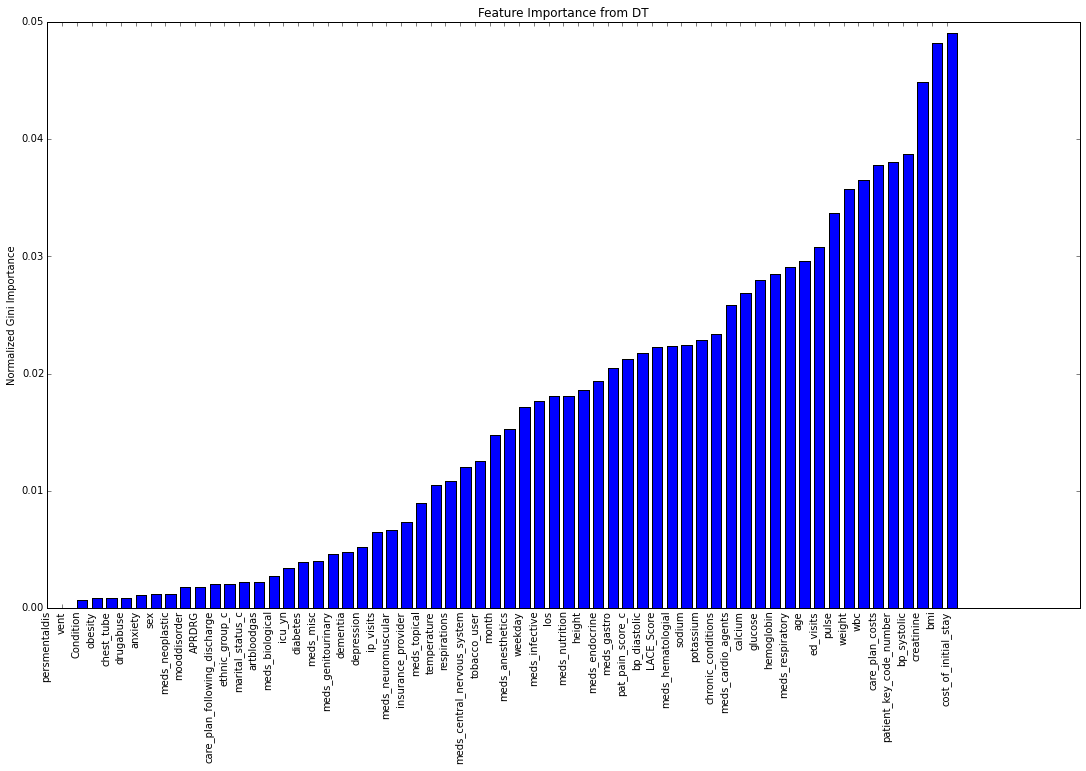

In [50]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals.six import StringIO
import StringIO, pydot

#Explicitly pull out the data we need
newdf = pd.DataFrame({'imp':clf.feature_importances_, 'feat':train_df.drop(label, 1).columns.values})
newdf = newdf.sort(columns = 'imp', axis = 0)


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
width=.7
ax.bar(np.arange(len(newdf.imp.values)), newdf.imp.values, width, color='b')
ax.set_xticks(np.arange(len(newdf.imp.values)))
ax.set_xticklabels(newdf.feat.values, rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

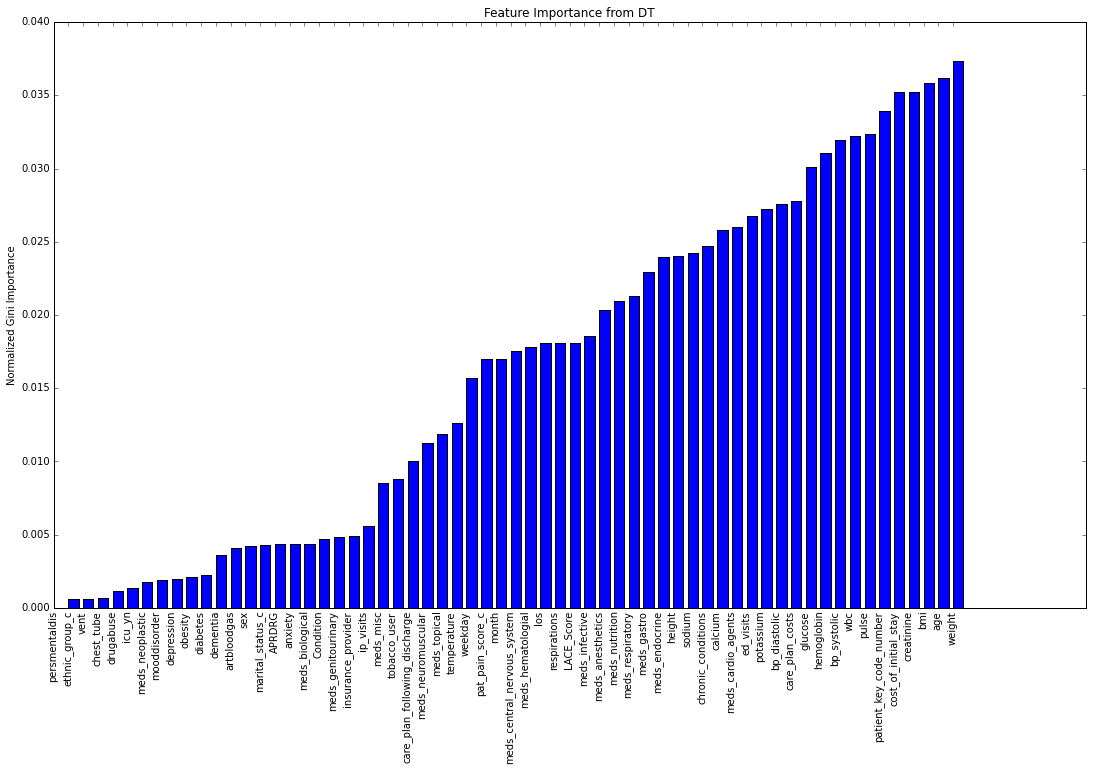

In [71]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals.six import StringIO
import StringIO, pydot

#Explicitly pull out the data we need
newdf = pd.DataFrame({'imp':clf2.feature_importances_, 'feat':train_df.drop(label, 1).columns.values})
newdf = newdf.sort(columns = 'imp', axis = 0)


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
width=.7
ax.bar(np.arange(len(newdf.imp.values)), newdf.imp.values, width, color='b')
ax.set_xticks(np.arange(len(newdf.imp.values)))
ax.set_xticklabels(newdf.feat.values, rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

In [48]:
from sklearn import metrics

train_p = clf.predict(train_df.drop(['readmit30'], axis=1))
test_p = clf.predict(test_df.drop(['readmit30'], axis=1))
train_accuracy = metrics.accuracy_score(train_p, train_df['readmit30'])
test_accuracy = metrics.accuracy_score(test_p, test_df['readmit30'])

print 'train accuracy = {}, test accuracy = {}'.format(train_accuracy, test_accuracy)

train accuracy = 1.0, test accuracy = 0.724653312789


In [70]:
train_p = clf2.predict(train_df.drop(['readmit30'], axis=1))
test_p = clf2.predict(test_df.drop(['readmit30'], axis=1))
train_accuracy = metrics.accuracy_score(train_p, train_df['readmit30'])
test_accuracy = metrics.accuracy_score(test_p, test_df['readmit30'])

print 'train accuracy = {}, test accuracy = {}'.format(train_accuracy, test_accuracy)

train accuracy = 0.977041602465, test accuracy = 0.826964560863


In [65]:
train_p = clf3.predict(train_df.drop(['readmit30'], axis=1))
test_p = clf3.predict(test_df.drop(['readmit30'], axis=1))
train_accuracy = metrics.accuracy_score(train_p, train_df['readmit30'])
test_accuracy = metrics.accuracy_score(test_p, test_df['readmit30'])

print 'train accuracy = {}, test accuracy = {}'.format(train_accuracy, test_accuracy)

train accuracy = 1.0, test accuracy = 0.818798151002


In [67]:
train_p = clf4.predict(train_df.drop(['readmit30'], axis=1))
test_p = clf4.predict(test_df.drop(['readmit30'], axis=1))
train_accuracy = metrics.accuracy_score(train_p, train_df['readmit30'])
test_accuracy = metrics.accuracy_score(test_p, test_df['readmit30'])

print 'train accuracy = {}, test accuracy = {}'.format(train_accuracy, test_accuracy)

train accuracy = 0.283975346687, test accuracy = 0.276579352851


In [69]:
train_p = clf5.predict(train_df.drop(['readmit30'], axis=1))
test_p = clf5.predict(test_df.drop(['readmit30'], axis=1))
train_accuracy = metrics.accuracy_score(train_p, train_df['readmit30'])
test_accuracy = metrics.accuracy_score(test_p, test_df['readmit30'])

print 'train accuracy = {}, test accuracy = {}'.format(train_accuracy, test_accuracy)

train accuracy = 0.792758089368, test accuracy = 0.797688751926
